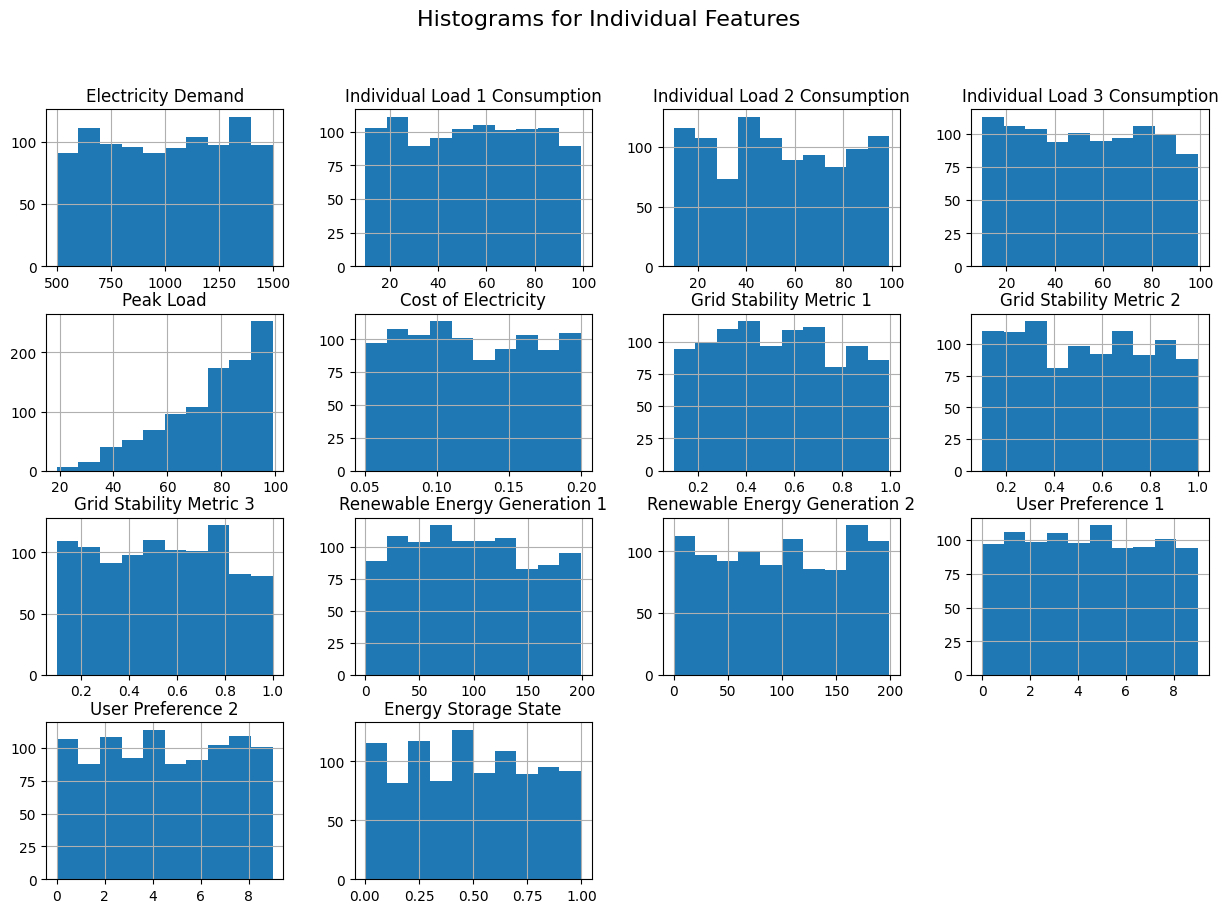

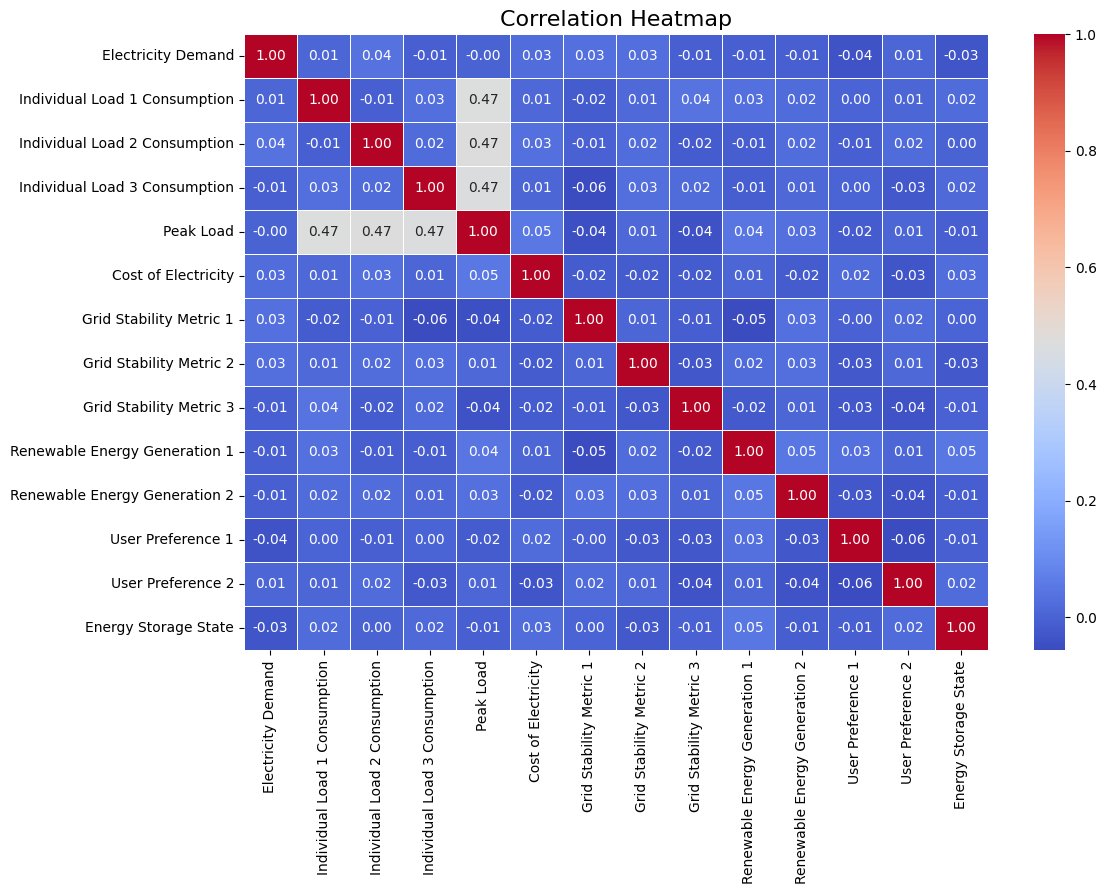

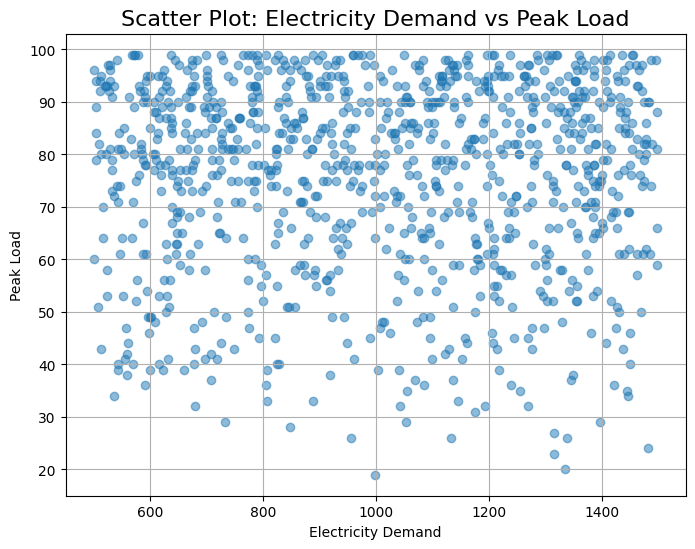

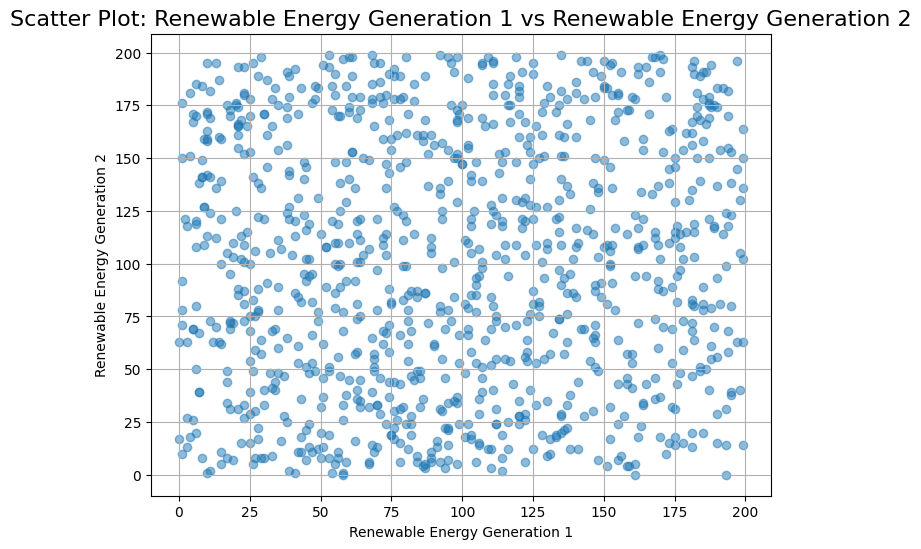

ARIMA RMSE: 399.1604308023622
SARIMA RMSE: 406.3696604276062


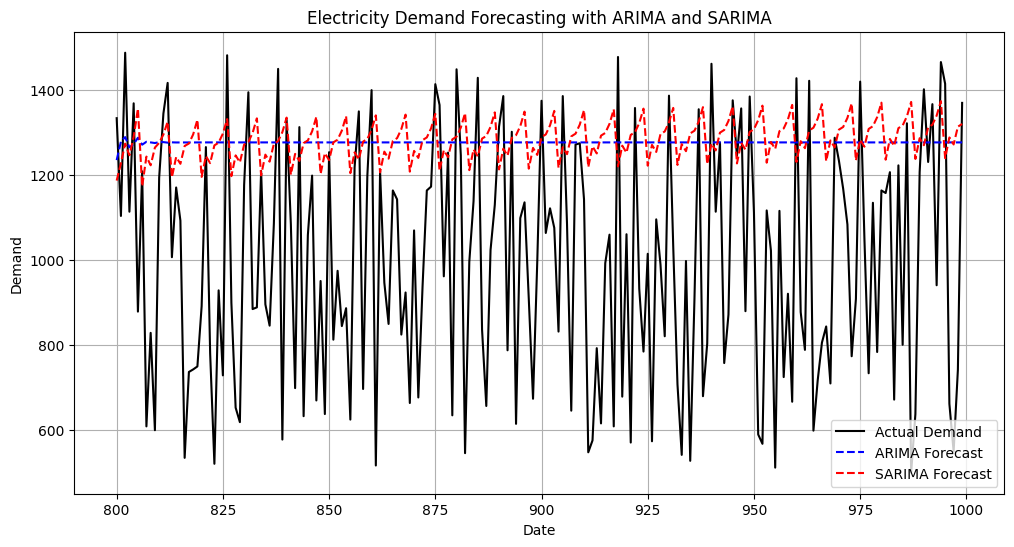

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generate synthetic data for each label
def generate_synthetic_data(num_data_points):
    np.random.seed(0)
    electricity_demand = np.random.randint(500, 1500, size=num_data_points)  # Random demand values
    individual_load_consumption = np.random.randint(10, 100, size=(num_data_points, 3))  # Three types of loads
    peak_load = np.max(individual_load_consumption, axis=1)  # Assume peak load is the maximum load among all loads
    cost_of_electricity = np.random.uniform(0.05, 0.2, size=num_data_points)  # Random cost values
    grid_stability_metrics = np.random.uniform(0.1, 1, size=(num_data_points, 3))  # Three stability metrics
    renewable_energy_generation = np.random.randint(0, 200, size=(num_data_points, 2))  # Two types of renewable energy
    user_preferences_constraints = np.random.randint(0, 10, size=(num_data_points, 2))  # Two user preference values
    energy_storage_state = np.random.uniform(0, 1, size=num_data_points)  # Random state of charge values

    # Create a DataFrame containing the synthetic data
    data = pd.DataFrame({
        'Electricity Demand': electricity_demand,
        'Individual Load 1 Consumption': individual_load_consumption[:, 0],
        'Individual Load 2 Consumption': individual_load_consumption[:, 1],
        'Individual Load 3 Consumption': individual_load_consumption[:, 2],
        'Peak Load': peak_load,
        'Cost of Electricity': cost_of_electricity,
        'Grid Stability Metric 1': grid_stability_metrics[:, 0],
        'Grid Stability Metric 2': grid_stability_metrics[:, 1],
        'Grid Stability Metric 3': grid_stability_metrics[:, 2],
        'Renewable Energy Generation 1': renewable_energy_generation[:, 0],
        'Renewable Energy Generation 2': renewable_energy_generation[:, 1],
        'User Preference 1': user_preferences_constraints[:, 0],
        'User Preference 2': user_preferences_constraints[:, 1],
        'Energy Storage State': energy_storage_state
    })
    return data

# Generate synthetic dataset
data = generate_synthetic_data(num_data_points=1000)
import seaborn as sns

# Plot histograms for individual features
data.hist(figsize=(15, 10))
plt.suptitle('Histograms for Individual Features', fontsize=16)
plt.show()

# Plot correlation heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Scatter plot between electricity demand and peak load
plt.figure(figsize=(8, 6))
plt.scatter(data['Electricity Demand'], data['Peak Load'], alpha=0.5)
plt.title('Scatter Plot: Electricity Demand vs Peak Load', fontsize=16)
plt.xlabel('Electricity Demand')
plt.ylabel('Peak Load')
plt.grid(True)
plt.show()

# Scatter plot between renewable energy generation 1 and renewable energy generation 2
plt.figure(figsize=(8, 6))
plt.scatter(data['Renewable Energy Generation 1'], data['Renewable Energy Generation 2'], alpha=0.5)
plt.title('Scatter Plot: Renewable Energy Generation 1 vs Renewable Energy Generation 2', fontsize=16)
plt.xlabel('Renewable Energy Generation 1')
plt.ylabel('Renewable Energy Generation 2')
plt.grid(True)
plt.show()



# Train-test split
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Fit ARIMA model for electricity demand forecasting
arima_model = ARIMA(train_data['Electricity Demand'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test_data))

# Fit SARIMA model for electricity demand forecasting
sarima_model = SARIMAX(train_data['Electricity Demand'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test_data))

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_data['Electricity Demand'], arima_forecast))

# Calculate RMSE for SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test_data['Electricity Demand'], sarima_forecast))

# Print RMSE for both models
print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)

# Plot actual vs forecasted electricity demand
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Electricity Demand'], label='Actual Demand', color='black')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', linestyle='--', color='red')
plt.title('Electricity Demand Forecasting with ARIMA and SARIMA')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Example load scheduling algorithm
def schedule_loads(electricity_demand_forecast, user_preferences):
    peak_demand_threshold = user_preferences['peak_demand_threshold']
    cost_preference = user_preferences['cost_preference']

    # Assume off-peak hours are from 10 PM to 6 AM
    off_peak_hours = (electricity_demand_forecast.index.hour < 6) | (electricity_demand_forecast.index.hour >= 22)

    # Initialize load schedule
    load_schedule = pd.DataFrame(index=electricity_demand_forecast.index, columns=['Lighting', 'Appliances', 'HVAC'])
    load_schedule[:] = 0  # Initially, no loads are scheduled

    # Calculate total electricity demand during off-peak hours
    off_peak_demand = electricity_demand_forecast[off_peak_hours].sum()

    # Determine load priorities based on user preferences
    if cost_preference == 'minimize':
        # Prioritize operating loads with lower electricity consumption during off-peak hours to minimize costs
        load_schedule.loc[off_peak_hours, 'Lighting'] = min(100, off_peak_demand * 0.2)  # Lighting consumes up to 20% of off-peak demand
        load_schedule.loc[off_peak_hours, 'Appliances'] = min(200, off_peak_demand * 0.4)  # Appliances consume up to 40% of off-peak demand
        load_schedule.loc[off_peak_hours, 'HVAC'] = min(300, off_peak_demand * 0.6)  # HVAC consumes up to 60% of off-peak demand
    else:
        # Default: prioritize continuous operation of critical loads
        load_schedule['HVAC'] = 300  # HVAC operates continuously at maximum power
        load_schedule['Appliances'] = 200  # Appliances operate continuously at medium power
        load_schedule['Lighting'] = 100  # Lighting operates continuously at low power

    # Ensure that total electricity demand does not exceed the peak demand threshold
    total_demand = load_schedule.sum(axis=1)
    load_scale_factor = min(peak_demand_threshold / total_demand.max(), 1.0)
    load_schedule *= load_scale_factor

    return load_schedule

# Example usage:
forecasted_demand = pd.Series([800, 850, 900, 950, 1000, 1050, 1100, 1150], index=pd.date_range('2022-04-01', periods=8, freq='H'))
user_preferences = {
    'peak_demand_threshold': 1200,  # Example: Peak demand threshold in watts
    'cost_preference': 'minimize',  # Example: Minimize electricity costs
}

# Schedule loads
load_schedule = schedule_loads(forecasted_demand, user_preferences)
print("Load Schedule:\n", load_schedule)


Load Schedule:
                     Lighting Appliances   HVAC
2022-04-01 00:00:00    100.0      200.0  300.0
2022-04-01 01:00:00    100.0      200.0  300.0
2022-04-01 02:00:00    100.0      200.0  300.0
2022-04-01 03:00:00    100.0      200.0  300.0
2022-04-01 04:00:00    100.0      200.0  300.0
2022-04-01 05:00:00    100.0      200.0  300.0
2022-04-01 06:00:00      0.0        0.0    0.0
2022-04-01 07:00:00      0.0        0.0    0.0


In [ ]:
def schedule_loads_arima(electricity_demand_forecast, user_preferences):
    peak_demand_threshold = user_preferences['peak_demand_threshold']
    cost_preference = user_preferences['cost_preference']

    # Assume off-peak hours are from 10 PM to 6 AM
    off_peak_hours = (electricity_demand_forecast.index.hour < 6) | (electricity_demand_forecast.index.hour >= 22)

    # Initialize load schedule
    load_schedule = pd.DataFrame(index=electricity_demand_forecast.index, columns=['Lighting', 'Appliances', 'HVAC'])
    load_schedule[:] = 0  # Initially, no loads are scheduled

    # Calculate total electricity demand during off-peak hours
    off_peak_demand = electricity_demand_forecast[off_peak_hours].sum()

    # Determine load priorities based on user preferences
    if cost_preference == 'minimize':
        # Prioritize operating loads with lower electricity consumption during off-peak hours to minimize costs
        load_schedule.loc[off_peak_hours, 'Lighting'] = min(100, off_peak_demand * 0.2)  # Lighting consumes up to 20% of off-peak demand
        load_schedule.loc[off_peak_hours, 'Appliances'] = min(200, off_peak_demand * 0.4)  # Appliances consume up to 40% of off-peak demand
        load_schedule.loc[off_peak_hours, 'HVAC'] = min(300, off_peak_demand * 0.6)  # HVAC consumes up to 60% of off-peak demand
    else:
        # Default: prioritize continuous operation of critical loads
        load_schedule['HVAC'] = 300  # HVAC operates continuously at maximum power
        load_schedule['Appliances'] = 200  # Appliances operate continuously at medium power
        load_schedule['Lighting'] = 100  # Lighting operates continuously at low power

    # Ensure that total electricity demand does not exceed the peak demand threshold
    total_demand = load_schedule.sum(axis=1)
    load_scale_factor = min(peak_demand_threshold / total_demand.max(), 1.0)
    load_schedule *= load_scale_factor

    return load_schedule


def schedule_loads_sarima(electricity_demand_forecast, user_preferences):
    peak_demand_threshold = user_preferences['peak_demand_threshold']
    cost_preference = user_preferences['cost_preference']

    # Assume off-peak hours are from 10 PM to 6 AM
    off_peak_hours = (electricity_demand_forecast.index.hour < 6) | (electricity_demand_forecast.index.hour >= 22)

    # Initialize load schedule
    load_schedule = pd.DataFrame(index=electricity_demand_forecast.index, columns=['Lighting', 'Appliances', 'HVAC'])
    load_schedule[:] = 0  # Initially, no loads are scheduled

    # Calculate total electricity demand during off-peak hours
    off_peak_demand = electricity_demand_forecast[off_peak_hours].sum()

    # Determine load priorities based on user preferences
    if cost_preference == 'minimize':
        # Prioritize operating loads with lower electricity consumption during off-peak hours to minimize costs
        load_schedule.loc[off_peak_hours, 'Lighting'] = min(100, off_peak_demand * 0.2)  # Lighting consumes up to 20% of off-peak demand
        load_schedule.loc[off_peak_hours, 'Appliances'] = min(200, off_peak_demand * 0.4)  # Appliances consume up to 40% of off-peak demand
        load_schedule.loc[off_peak_hours, 'HVAC'] = min(300, off_peak_demand * 0.6)  # HVAC consumes up to 60% of off-peak demand
    else:
        # Default: prioritize continuous operation of critical loads
        load_schedule['HVAC'] = 300  # HVAC operates continuously at maximum power
        load_schedule['Appliances'] = 200  # Appliances operate continuously at medium power
        load_schedule['Lighting'] = 100  # Lighting operates continuously at low power

    # Ensure that total electricity demand does not exceed the peak demand threshold
    total_demand = load_schedule.sum(axis=1)
    load_scale_factor = min(peak_demand_threshold / total_demand.max(), 1.0)
    load_schedule *= load_scale_factor

    return load_schedule


In [ ]:
# Example usage of load scheduling with ARIMA forecast
arima_forecast_example = pd.Series([800, 850, 900, 950, 1000, 1050, 1100, 1150], index=pd.date_range('2022-04-01', periods=8, freq='H'))
user_preferences_example = {
    'peak_demand_threshold': 1200,  # Example: Peak demand threshold in watts
    'cost_preference': 'minimize',  # Example: Minimize electricity costs
}

load_schedule_arima = schedule_loads_arima(arima_forecast_example, user_preferences_example)
print("Load Schedule with ARIMA forecast:\n", load_schedule_arima)

# Example usage of load scheduling with SARIMA forecast
sarima_forecast_example = pd.Series([820, 830, 890, 950, 990, 1000, 1050, 1100], index=pd.date_range('2022-04-01', periods=8, freq='H'))
load_schedule_sarima = schedule_loads_sarima(sarima_forecast_example, user_preferences_example)
print("\nLoad Schedule with SARIMA forecast:\n", load_schedule_sarima)


Load Schedule with ARIMA forecast:
                     Lighting Appliances   HVAC
2022-04-01 00:00:00    100.0      200.0  300.0
2022-04-01 01:00:00    100.0      200.0  300.0
2022-04-01 02:00:00    100.0      200.0  300.0
2022-04-01 03:00:00    100.0      200.0  300.0
2022-04-01 04:00:00    100.0      200.0  300.0
2022-04-01 05:00:00    100.0      200.0  300.0
2022-04-01 06:00:00      0.0        0.0    0.0
2022-04-01 07:00:00      0.0        0.0    0.0

Load Schedule with SARIMA forecast:
                     Lighting Appliances   HVAC
2022-04-01 00:00:00    100.0      200.0  300.0
2022-04-01 01:00:00    100.0      200.0  300.0
2022-04-01 02:00:00    100.0      200.0  300.0
2022-04-01 03:00:00    100.0      200.0  300.0
2022-04-01 04:00:00    100.0      200.0  300.0
2022-04-01 05:00:00    100.0      200.0  300.0
2022-04-01 06:00:00      0.0        0.0    0.0
2022-04-01 07:00:00      0.0        0.0    0.0
